In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Градиентный спуск

In [3]:
from SGD import SGD

## Функция Матьяса


In [5]:
def mathias_func(grid: np.array) -> float:
    x, y = grid[0], grid[1]
    return 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y

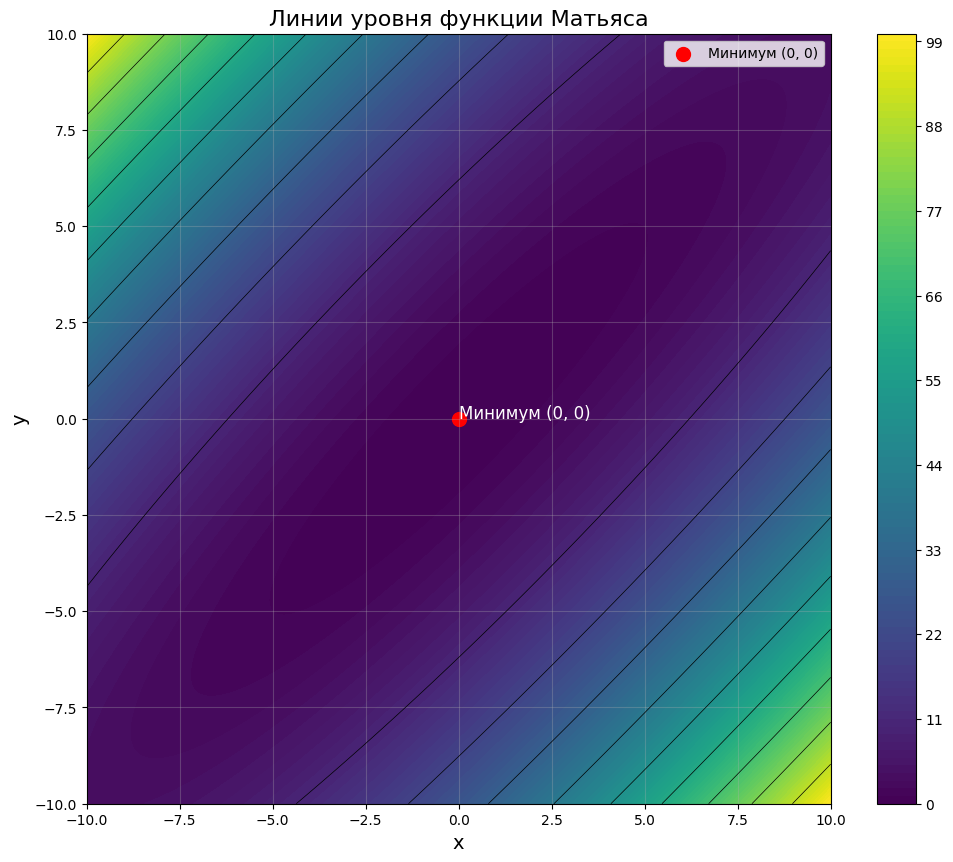

In [11]:
x = np.linspace(-10, 10, 500)  # Диапазон x
y = np.linspace(-10, 10, 500)  # Диапазон y
X, Y = np.meshgrid(x, y)       # Сетка

Z = np.array([[mathias_func(np.array([x, y])) for x in x] for y in y])

plt.figure(figsize=(12, 10))
contour = plt.contourf(X, Y, Z, levels=100, cmap='viridis')
plt.colorbar(contour)
plt.contour(X, Y, Z, levels=10, colors='black', linewidths=0.5)

min_x, min_y = 0, 0
plt.scatter(min_x, min_y, color='red', label='Минимум (0, 0)', s=100)
plt.annotate("Минимум (0, 0)", (min_x , min_y), color='white', fontsize=12)

plt.title("Линии уровня функции Матьяса", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [12]:
optimizer = SGD(lr=0.01,
                x_bound=(-10, 10),
                y_bound=(-10, 10),
                num_iter=1000,
                seed=42)

In [13]:
x_min = optimizer.optimize(mathias_func)

In [14]:
x_min

array([1.42670274, 1.42641342])

## Функция Трёхгорбого Верблюда

In [16]:
def three_humped_camel_func(grid: np.array) -> float:
    x, y = grid[0], grid[1]
    return 2 * x ** 2 - 1.05 * x ** 4 + x ** 6 / 6 + x * y + y ** 2

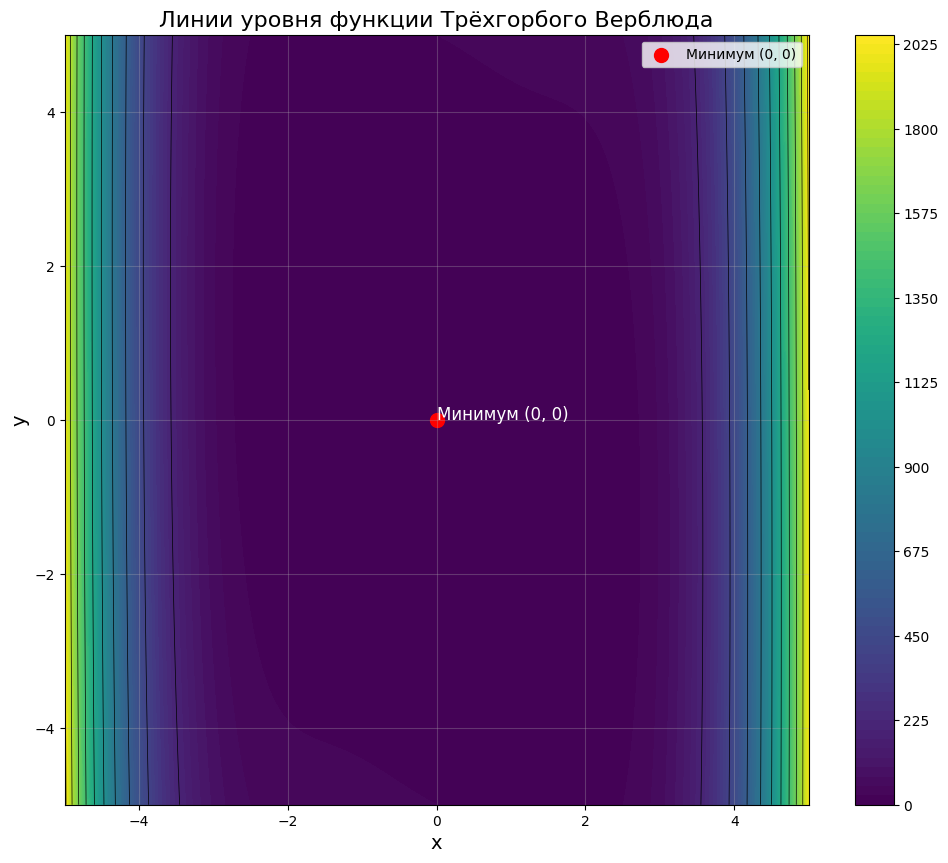

In [18]:
x = np.linspace(-5, 5, 500)  # Диапазон x
y = np.linspace(-5, 5, 500)  # Диапазон y
X, Y = np.meshgrid(x, y)       # Сетка

Z = np.array([[three_humped_camel_func(np.array([x, y])) for x in x] for y in y])

plt.figure(figsize=(12, 10))
contour = plt.contourf(X, Y, Z, levels=100, cmap='viridis')
plt.colorbar(contour)
plt.contour(X, Y, Z, levels=10, colors='black', linewidths=0.5)

min_x, min_y = 0, 0
plt.scatter(min_x, min_y, color='red', label=f'Минимум ({min_x}, {min_y})', s=100)
plt.annotate("Минимум (0, 0)", (min_x, min_y), color='white', fontsize=12)

plt.title("Линии уровня функции Трёхгорбого Верблюда", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [19]:
optimizer = SGD(lr=0.01,
                x_bound=(-5, 5),
                y_bound=(-5, 5),
                num_iter=1000,
                seed=1)

In [20]:
x_min = optimizer.optimize(three_humped_camel_func)

In [21]:
x_min

array([-2.53555924e-07,  6.12138150e-07])

# Nesterov momentum

In [22]:
from Nesterov import Nesterov

## Функция Матьяса

In [23]:
optimizer = Nesterov(lr=0.01,
                     momentum=0.9,
                     x_bound=(-10, 10),
                     y_bound=(-10, 10),
                     num_iter=100,
                     seed=42)

In [24]:
x_min = optimizer.optimize(mathias_func)

In [25]:
x_min

array([1.46102415, 1.46393809])

## Функция Трёхгорбого Верблюда

In [26]:
optimizer = Nesterov(lr=0.01,
                     momentum=0.9,
                     x_bound=(-5, 5),
                     y_bound=(-5, 5),
                     num_iter=100,
                     seed=42)

In [27]:
x_min = optimizer.optimize(three_humped_camel_func)
x_min

array([-1.74726847,  0.87073347])

# Adam

In [28]:
from Adam import Adam

## Функция Матьяса

In [30]:
optimizer = Adam(lr=0.01,
                 num_iter=1000,
                 x_bound=(-10, 10),
                 y_bound=(-10, 10),
                 seed=42)

In [31]:
x_min = optimizer.optimize(mathias_func)
x_min

array([1.75605123, 1.74149295])

## Функция Трёхгорбого Верблюда

In [32]:
optimizer = Adam(lr=0.01,
                 num_iter=1000,
                 x_bound=(-5, 5),
                 y_bound=(-5, 5),
                 seed=42)

In [33]:
x_min = optimizer.optimize(three_humped_camel_func)
x_min

array([ 1.74758276, -0.87379319])